In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from surfplot.datasets import load_example_data
from neuromaps.datasets import fetch_fslr
from neuromaps.transforms import mni152_to_fslr
from brainspace.datasets import load_parcellation
import matplotlib.ticker as ticker
import os
import numpy as np
import svgutils.transform as sg
import nibabel as nb
import copy
import sys
sys.path.append('/home/andrea/research/')
from matplotlib.lines import Line2D

from fingerprinting.utils_neuromaps_brain import *

In [2]:
from scipy.io import loadmat
N=200
yeo_all=loadmat('/media/miplab-nas2/Data3/Danyang/Multi-Echo-BOLD_fingerprinting/yeo_RS7_Schafer{0}S.mat'.format(N))
nodeID_yeomap=np.array([i[0] for i in yeo_all['yeoROIs']])

In [3]:
node_strength=np.zeros(N)
for i in range(1,8):
    node_strength[np.array(nodeID_yeomap==i)[:N]]=(i)*10+np.random.normal(loc=0.0,scale=0.1,size=sum(np.array(nodeID_yeomap==i)[:N]))

In [4]:
node_strength.shape

(200,)

In [5]:
cmap = plt.get_cmap('tab20')
new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=0, b=1),
        cmap(np.linspace(0, 0.35, 1000)))

In [6]:
fig=normal_view(node_strength,edges=True,exp_form=False,q_thresh=0,cmap=new_cmap,parcellation=N,brightness=0.8,vmin=10,vmax=70)
fig

: 

: 

#### Random node strength mapped on the cortical surface

In [3]:
fig=normal_view(np.random.normal(size=400),edges=True,surftype='inflated',
                exp_form=False,q_thresh=0,cmap='custom',parcellation=400,graymap_rev=True)
fig

: 

: 

### Custom colormaps for the yeo networks (usual colors)

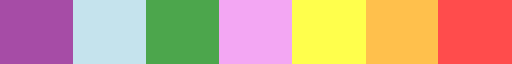

In [7]:
from matplotlib.colors import LinearSegmentedColormap
alpha=0.7
colors = [mpl.colors.to_rgba('purple',alpha), #Visual
          mpl.colors.to_rgba('lightblue',alpha),#Somatomotor
          mpl.colors.to_rgba('green',alpha),#Dorsal Attention
          mpl.colors.to_rgba('violet',alpha),#Ventral Attention
          mpl.colors.to_rgba('yellow',alpha),#Limbic
          mpl.colors.to_rgba('orange',alpha),#Frontoparietal
          mpl.colors.to_rgba('red',alpha),#Default
         ]
n_bin=7
cmap_name = 'my_list'

cmap = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bin)
cmap

In [ ]:
fig=full_view(node_strength,edges=True,exp_form=False,q_thresh=0,surftype='inflated',
              cmap=cmap,parcellation=400,brightness=0.7,vmin_plot=10,vmax_plot=70,xlabel='Yeo Netw.',graymap_rev=False,alpha_graymap=0.4)
compose_full_view();

rect = [Line2D([], [], marker="s", markersize=5, linewidth=0, color=colors[i]) for i in range(len(colors))]
#ax.legend((rect1, rect2), ('Men', 'Women'))
plt.legend(rect,('Visual', 'Somatomotor','Dorsal Attention',\
                 'Ventral Attention','Limbic','Frontoparietal','Default'),bbox_to_anchor=(1.5,0.8))